In [2]:
from skimage import io, transform, color, exposure
from skimage.feature import hog
from commonfunctions import *
from skimage.color import rgb2gray, rgb2hsv
from scipy.signal import convolve2d
import numpy as np
import cv2


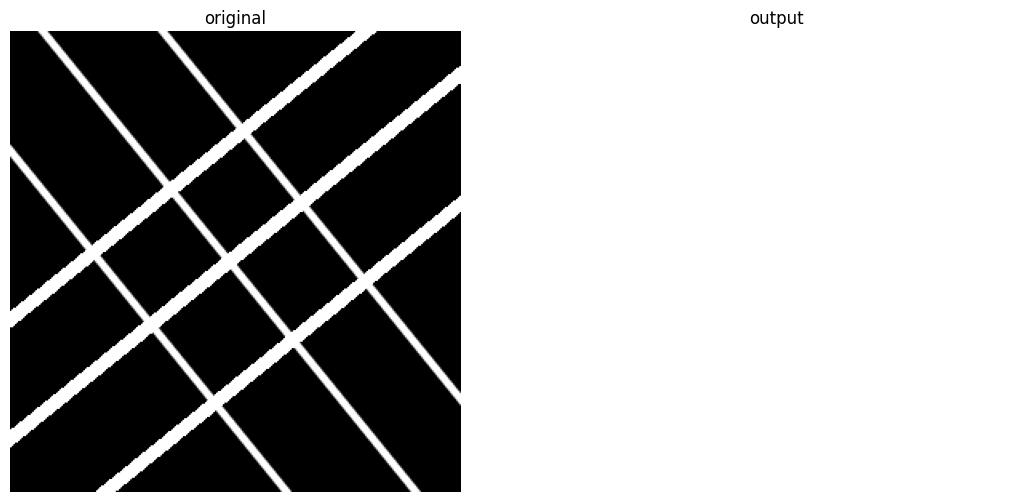

In [3]:
# apply hough transform to detect lines  with  135   degree  angle
def hough_lines(img):
    output = np.zeros_like(img)

    # 1- edge detection
    edges = cv2.Canny(img, 50, 150, apertureSize=3)
    
    # 2- hough transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    
    # 3- draw lines on the image
    for line in lines:
        rho, theta = line[0]
        if theta > 1.5:
            continue
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho

        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))

        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(img, (x1, y1), (x2, y2), (255, 255, 255), 2)
    return output

image = io.imread('Q1.png')
output = hough_lines(image)
show_images([image, output], ['original', "output"])

In [4]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np

# Reading the required image in
# which operations are to be done.
# Make sure that the image is in the same
# directory in which this python program is
img = cv2.imread('Q1.png')

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
	arr = np.array(r_theta[0], dtype=np.float64)
	r, theta = arr
	print(r, theta)
	
	# Stores the value of cos(theta) in a
	a = np.cos(theta)

	# Stores the value of sin(theta) in b
	b = np.sin(theta)

	# x0 stores the value rcos(theta)
	x0 = a*r

	# y0 stores the value rsin(theta)
	y0 = b*r

	# x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
	x1 = int(x0 + 1000*(-b))

	# y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
	y1 = int(y0 + 1000*(a))

	# x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
	x2 = int(x0 - 1000*(-b))

	# y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
	y2 = int(y0 - 1000*(a))

	# cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
	# (0,0,255) denotes the colour of the line to be
	# drawn. In this case, it is red.

    # deg to radian = deg * pi / 180
	if theta > 2.3:
	    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

	
cv2.imwrite('linesDetected.jpg', img)


200.0 0.890117883682251
195.0 0.890117883682251
-18.0 2.460914134979248
258.0 0.890117883682251
142.0 0.890117883682251
137.0 0.890117883682251
-72.0 2.460914134979248
263.0 0.890117883682251
-13.0 2.460914134979248
49.0 2.460914134979248


True

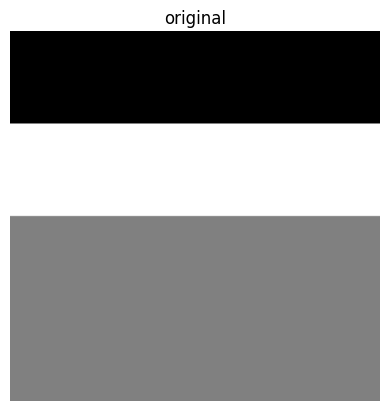

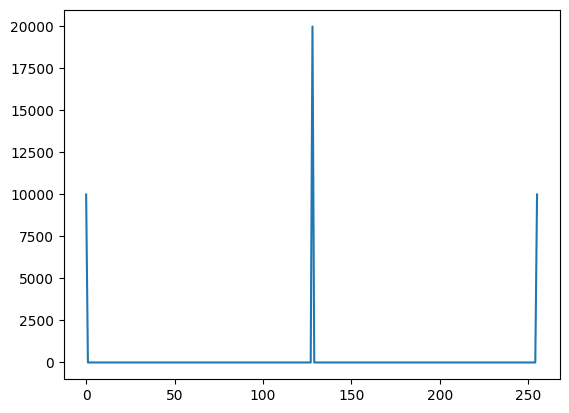

In [5]:
image = np.zeros((200, 200))
image[0:50, :] = 0
image[50:100,:] = 1
image[100:, :] = .5

show_images([image], ['original'])

# show histogram
hist, bins = exposure.histogram(image)
plt.plot(hist)
plt.show()




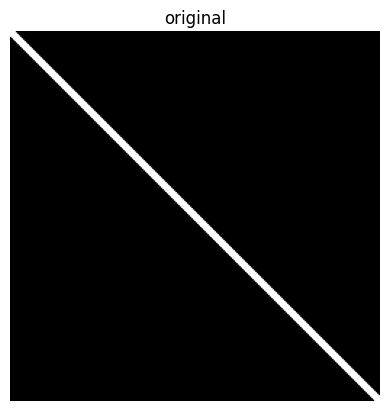

In [6]:
img = np.zeros((255, 255))
cv2.line(img, (0, 0), (255, 255), (250,250,0), 3)

show_images([img], ['original'])



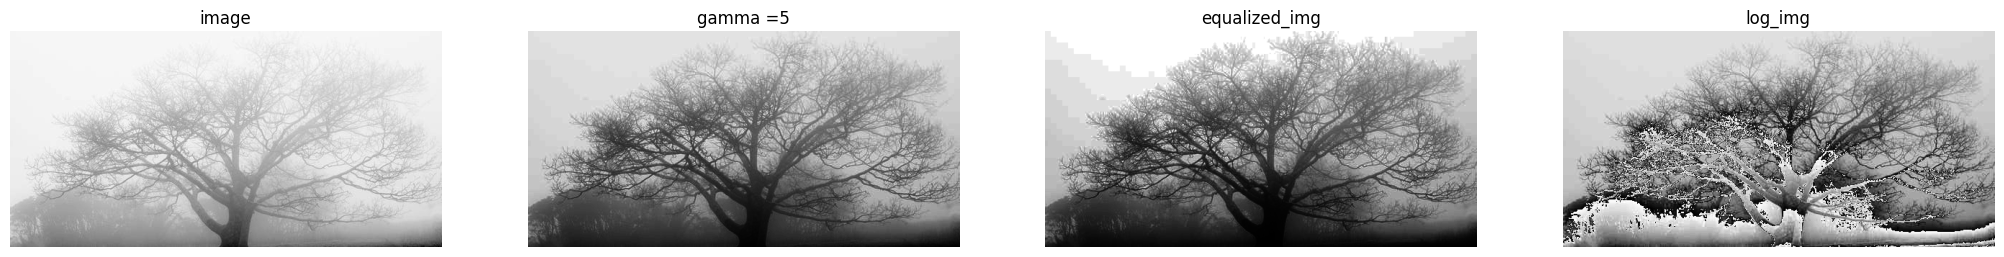

In [57]:

image=cv2.imread('Q3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


hist, bins = exposure.histogram(image)
#plt.plot(hist)
#plt.show()


# apply  gamma correction
gamma = 5
gamma_img = np.copy(image)
gamma_img = exposure.adjust_gamma(gamma_img, gamma)


#apply histogram equalization
equalized_img = exposure.equalize_hist(image)

negative_img = np.copy(image)
negative_img[negative_img < 180] = 0

#   apply logrithmic enhancement
log_img = np.copy(image)
log_img = exposure.adjust_log(log_img,6 )

show_images([image,gamma_img,equalized_img,log_img], ['image','gamma =5','equalized_img','log_img'])


In [68]:
import cv2

# Load the image
img = cv2.imread('Q4.jpg')


# Split the image into Y, Cr, and Cb channels
b, g, r = cv2.split(img)

# Apply histogram equalization to the Y channel
r_eq = cv2.equalizeHist(r)

# Merge the equalized Y channel back with the Cr and Cb channels
img_y_cr_cb_eq = cv2.merge((r_eq, g, b))

# Convert the image back to BGR color space
img_eq = cv2.cvtColor(img_y_cr_cb_eq, cv2.COLOR_YCrCb2BGR)

cv2.imwrite('Q4_output.jpg', img_eq)

True

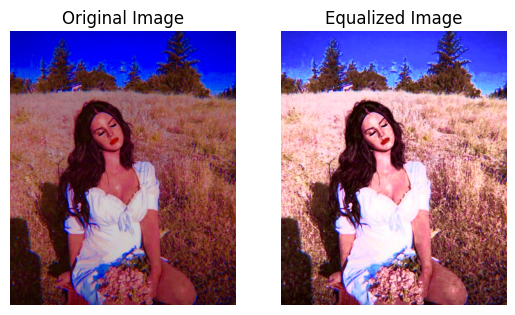

True

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization_rgb(image):
    # Convert the image to YUV color space
    yuv_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

    # Apply histogram equalization to the Y channel
    yuv_image[:,:,0] = cv2.equalizeHist(yuv_image[:,:,0])
    #yuv_image[:,:,1] = cv2.equalizeHist(yuv_image[:,:,1])
    #yuv_image[:,:,2] = cv2.equalizeHist(yuv_image[:,:,2])

    # Convert the image back to RGB color space
    equalized_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2RGB)

    return equalized_image

# Load the RGB image
original_image = cv2.imread('Q4.jpg') 

# Apply histogram equalization
equalized_image = histogram_equalization_rgb(original_image)

# Display the original and equalized images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

cv2.imwrite('Q4_output.jpg', equalized_image)


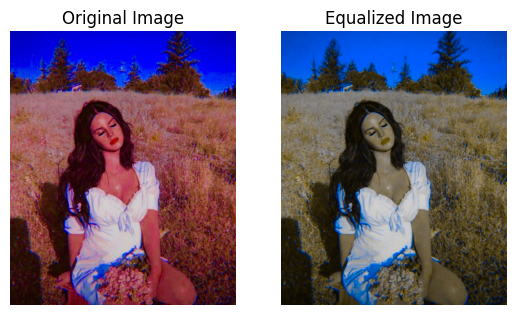

In [103]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage import io, color

# Load the RGB image
image_path = 'Q4.jpg'  # Replace 'path_to_your_image.jpg' with the actual file path
rgb_image = io.imread(image_path)

# Convert the RGB image to the Lab color space
lab_image = color.rgb2lab(rgb_image)

# Apply histogram equalization to the L channel (luminance)
#lab_image[:,:,0] = exposure.equalize_hist(lab_image[:,:,0])
lab_image[:,:,1] = exposure.equalize_hist(lab_image[:,:,1])
#lab_image[:,:,2] = exposure.equalize_hist(lab_image[:,:,2])

# Convert the Lab image back to RGB color space
equalized_rgb_image = color.lab2rgb(lab_image)

# Display the original and equalized images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_rgb_image)
plt.axis('off')

plt.show()
